In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
iris = load_iris()

In [20]:
columns = ['sepal_length' ,'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = columns)

In [21]:
irisDF['target'] = iris.target

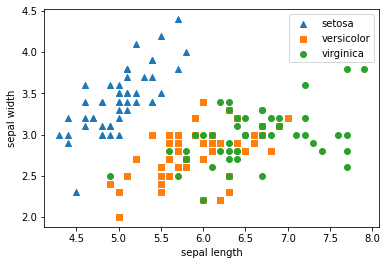

In [23]:
markers = ['^', 's','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [27]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components = 2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [30]:
pca_columns = ['pca_comp1', 'pca_comp2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca

,pca_comp1,pca_comp2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


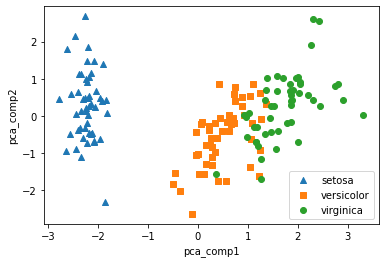

In [31]:
markers = ['^', 's','o']

for i , marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i ]['pca_comp1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i ]['pca_comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_comp1')
plt.ylabel('pca_comp2')
plt.show()

In [34]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [36]:
rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)
scores

array([0.98, 0.94, 0.96])